<a href="https://colab.research.google.com/github/FSMahi/MNIST-Digit-Classifier-with-ANN-CNN/blob/main/MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models,Sequential
from tensorflow.keras.layers import Dense,Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from scipy.io import loadmat
from keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam # Import Adam optimizer
import warnings
warnings.simplefilter('ignore')

# 2. Data preparation

## 2.1 Load Data

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

Training samples: (60000, 28, 28), Test samples: (10000, 28, 28)


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test.shape

(10000,)

[11131 26389 39358  3043  8276 33879 25946  4669]


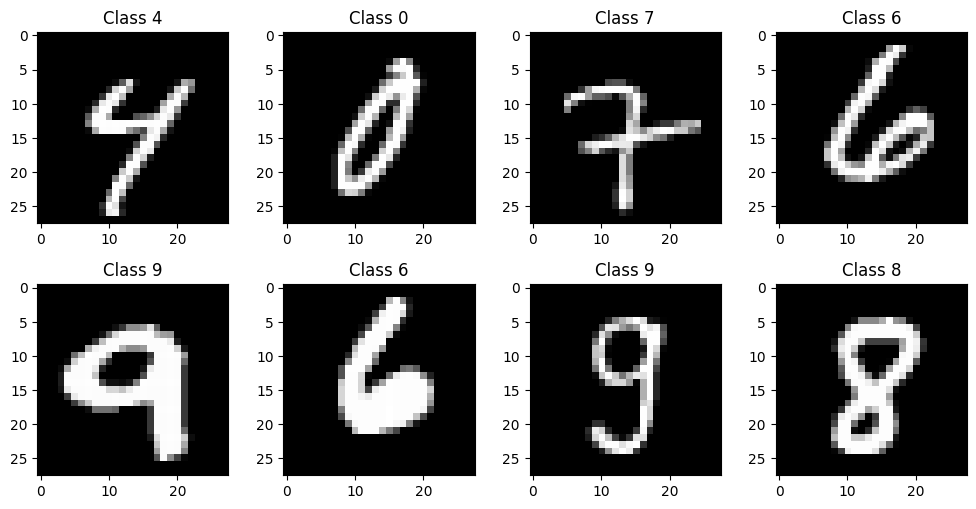

In [ ]:
# show image of training data
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, x_train.shape[0], 8) # select 8 digits(0~9) randomly
print(rand_indexes)

for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(x_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
plt.tight_layout()

In [ ]:
# Convert y_train to a Series and use value_counts()
y_train_series = pd.Series(y_train)
print(y_train_series.value_counts().sort_index())

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


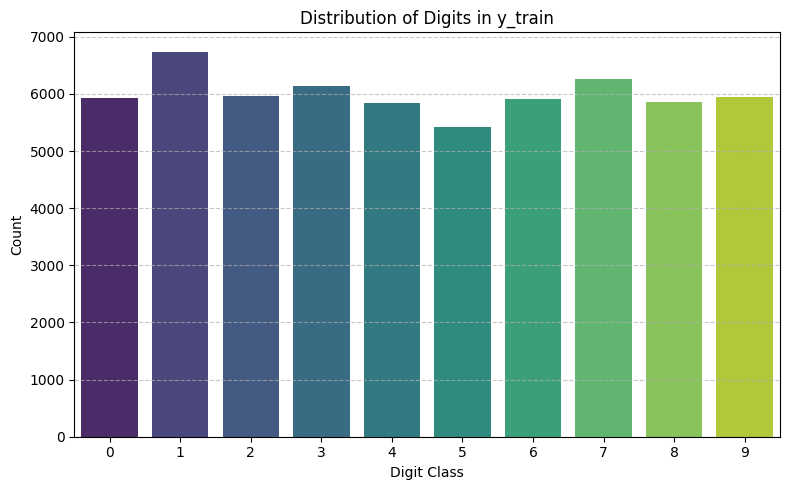

In [ ]:
# Convert y_train to a DataFrame
y_train_df = pd.DataFrame(y_train, columns=['digit'])

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=y_train_df, x='digit', palette='viridis')

plt.title('Distribution of Digits in y_train')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We have similar counts for the 10 digits.

## 2.2 Check for null and missing values

In [ ]:
# Check for any NaN values in x_train
has_nan = np.isnan(x_train).any()
print("Any NaN in x_train?", has_nan)

# Count total number of NaN values
nan_count = np.isnan(x_train).sum()
print("Total NaN values in x_train:", nan_count)


Any NaN in x_train? False
Total NaN values in x_train: 0


In [ ]:
# Check for any NaN values in x_test
has_nan = np.isnan(x_test).any()
print("Any NaN in x_test?", has_nan)

# Count total number of NaN values
nan_count = np.isnan(x_test).sum()
print("Total NaN values in x_test:", nan_count)


Any NaN in x_test? False
Total NaN values in x_test: 0


There is no missing values in the train and test dataset. So we can safely go ahead.

## 2.3 Normalization

In [ ]:
# Normalize images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

We perform a grayscale normalization to reduce the effect of illumination's differences.

## 2.3 Reshape

In [ ]:
# Flatten the images (28x28 → 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

Reshaping the image from 2D to 1D

## 2.5 Encoding

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

For example, 2 becomes [0,0,1,0,0,0,0,0,0,0] and 7 becomes [0,0,0,0,0,0,0,1,0,0].


In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 2.6 Split training and valdiation set

In [ ]:
# Set the random seed
random_seed = 2

In [ ]:
# Split the train and the test set for the fitting
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [ ]:
x_train.shape

(54000, 784)

I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model.

Since we have 54000 training images of balanced labels (see 2.1 Load data), a random split of the train set doesn't cause some labels to be over represented in the validation set. Be carefull with some unbalanced dataset a simple random split could cause inaccurate evaluation during the validation.

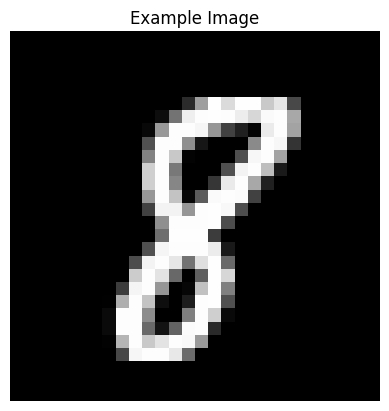

In [ ]:
# Some examples
# Reshape the 1D array back to 2D (28x28) for displaying
image_to_display = x_train[9].reshape(28, 28)
g = plt.imshow(image_to_display, cmap='gray')
plt.title('Example Image')
plt.axis('off') # Hide axes
plt.show()

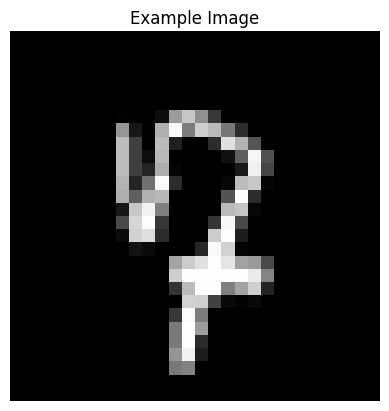

In [ ]:
import matplotlib.pyplot as plt
# Reshape the 1D array back to 2D (28x28) for displaying
image_to_display = x_train[2].reshape(28, 28)
plt.imshow(image_to_display, cmap='gray')
plt.title('Example Image')
plt.axis('off') # Hide axes
plt.show()

# 3. Model

## 3.1 ANN Model

In [ ]:
# Define ANN Model
model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.3)),

model.add(Dense(128,activation='relu')),
model.add(BatchNormalization()),
model.add(Dropout(0.3)),

model.add(Dense(64,activation='relu')),
model.add(BatchNormalization()),

model.add(Dense(10,activation='softmax'))

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)


    # First hidden layer: 256 neurons with ReLU activation
    # Input shape is 784 (flattened 28x28 image)
    # Batch Normalization improves training stability and convergence speed
    BatchNormalization(),
    # Dropout randomly disables 30% of neurons to prevent overfitting
    Dropout(0.3),

    # Second hidden layer: 128 neurons with ReLU activation
    BatchNormalization(),
    Dropout(0.3),

    # Third hidden layer: 64 neurons with ReLU activation
    BatchNormalization(),
    # No dropout here to retain useful information

    # Output layer: 10 neurons (digits 0–9), softmax converts to probability distribution

## 3.2 Set the optimizer

In [ ]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer= optimizer, metrics=['accuracy'])

In [ ]:
batch_size = 64
num_classes = 10
epochs = 15

## 3.2 Fit the Training Data

The next step is to fit our training data. If we achieve a certain level of accuracy, it may not be necessary to continue training the model, especially if time and resources are limited.

The following cell defines a CallBack so that if 99.5% accuracy is achieved, the model stops training.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

# Initialize callback
callbacks = myCallback()


In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])


Epoch 1/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8110 - loss: 0.6112 - val_accuracy: 0.9522 - val_loss: 0.1541
Epoch 2/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9422 - loss: 0.1914 - val_accuracy: 0.9606 - val_loss: 0.1290
Epoch 3/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9522 - loss: 0.1540 - val_accuracy: 0.9654 - val_loss: 0.1182
Epoch 4/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9611 - loss: 0.1231 - val_accuracy: 0.9685 - val_loss: 0.0983
Epoch 5/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9638 - loss: 0.1109 - val_accuracy: 0.9737 - val_loss: 0.0894
Epoch 6/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9695 - loss: 0.0980 - val_accuracy: 0.9791 - val_loss: 0.0789
Epoch 7/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9723 - loss: 0.0879 - val_accuracy: 0.9728 - val_loss: 0.0920
Epoch 8/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9728 - loss: 0.0850 - val_accura

📌 Outcome:

Model trains for up to 15 epochs (unless stopped early).

Uses 10% of the training data for validation.

The custom callback monitors training accuracy.

If training accuracy exceeds 99.5%, training stops, and a message is printed.

# 4. Evaluate the Model

## 4.1 Predict Results

In [ ]:
#test model
preds = model.predict(x_test[0].reshape(1, 784))
print(int(np.argmax(preds)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2


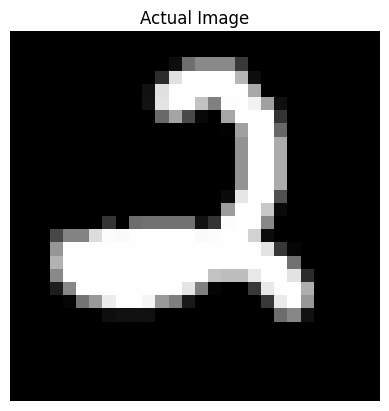

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title('Actual Image')
plt.axis('off') # Hide axes
plt.show()

The model predicted it correctly

In [ ]:
#test model
preds = model.predict(x_test[10].reshape(1, 784))
print(int(np.argmax(preds)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0


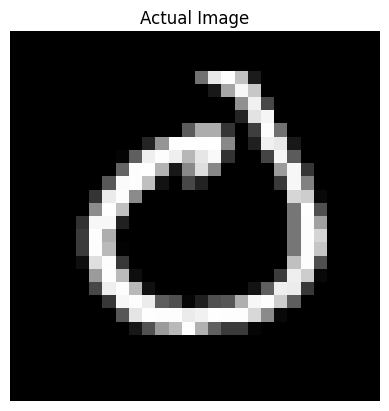

In [ ]:
plt.imshow(x_test[10].reshape(28, 28), cmap='gray')
plt.title('Actual Image')
plt.axis('off') # Hide axes
plt.show()

The model predicted it correctly

In [ ]:
#Evaluate Model
score = model.evaluate(x_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0796
Test loss:  0.07574930787086487
Test accuracy:  0.9778333306312561


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


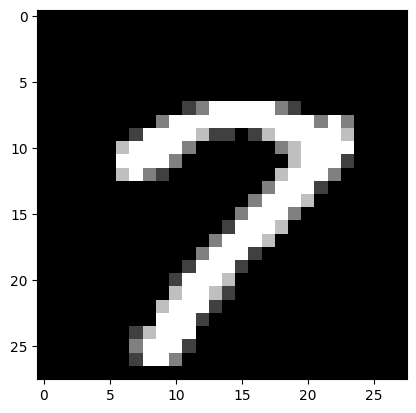

In [ ]:
plt.imshow(x_test[100].reshape(28, 28), cmap='gray')
print(y_test[100])

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=2)
print("Test Accuracy: ", test_acc)
print("Test loss:", test_loss)

188/188 - 0s - 3ms/step - accuracy: 0.9778 - loss: 0.0757
Test Accuracy:  0.9778333306312561
Test loss: 0.07574930787086487


## 4.2 Loss and Accuracy Curves

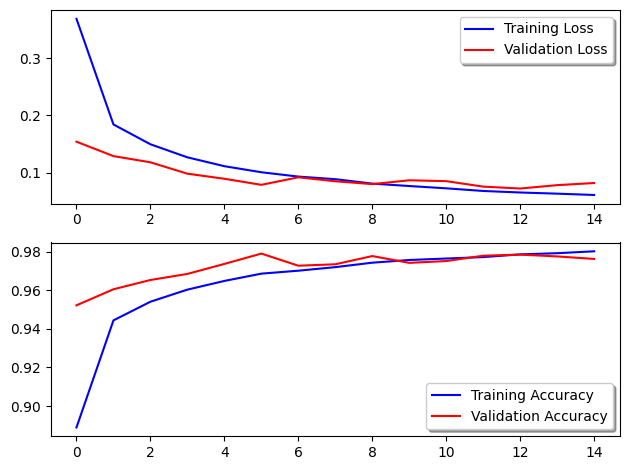

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## 4.3 Confusion Matrix

In [ ]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

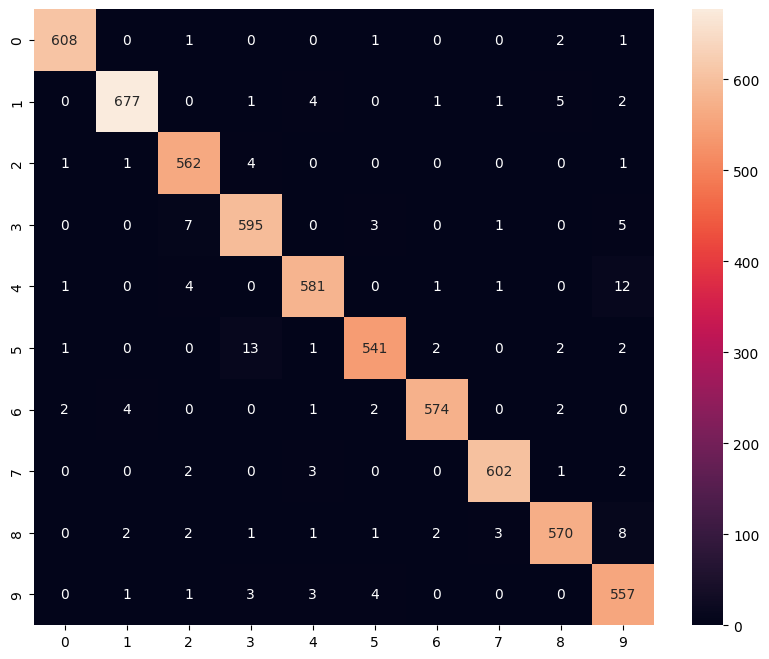

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

# Plot a few correct predicted samples and a few misclassified samples.

In [ ]:
# Show some wrong results, and the difference between the predicted label and the real labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

In [ ]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

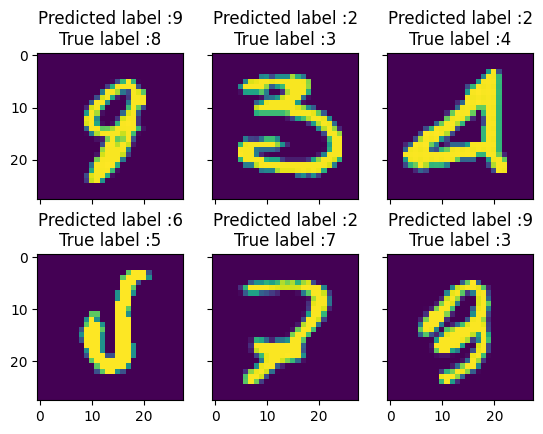

In [ ]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
#get the predictions for the test data
Y_pred = model.predict(x_test)
#get the indices to be plotted
y_true = np.argmax(y_test,axis=1)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
correct = np.nonzero(Y_pred_classes==y_true)[0]
misclassified = np.nonzero(Y_pred_classes!=y_true)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Misclassified predicted classes:",misclassified.shape[0])

Correct predicted classes: 5867
Misclassified predicted classes: 133


## Displaying some Correct predicted samples

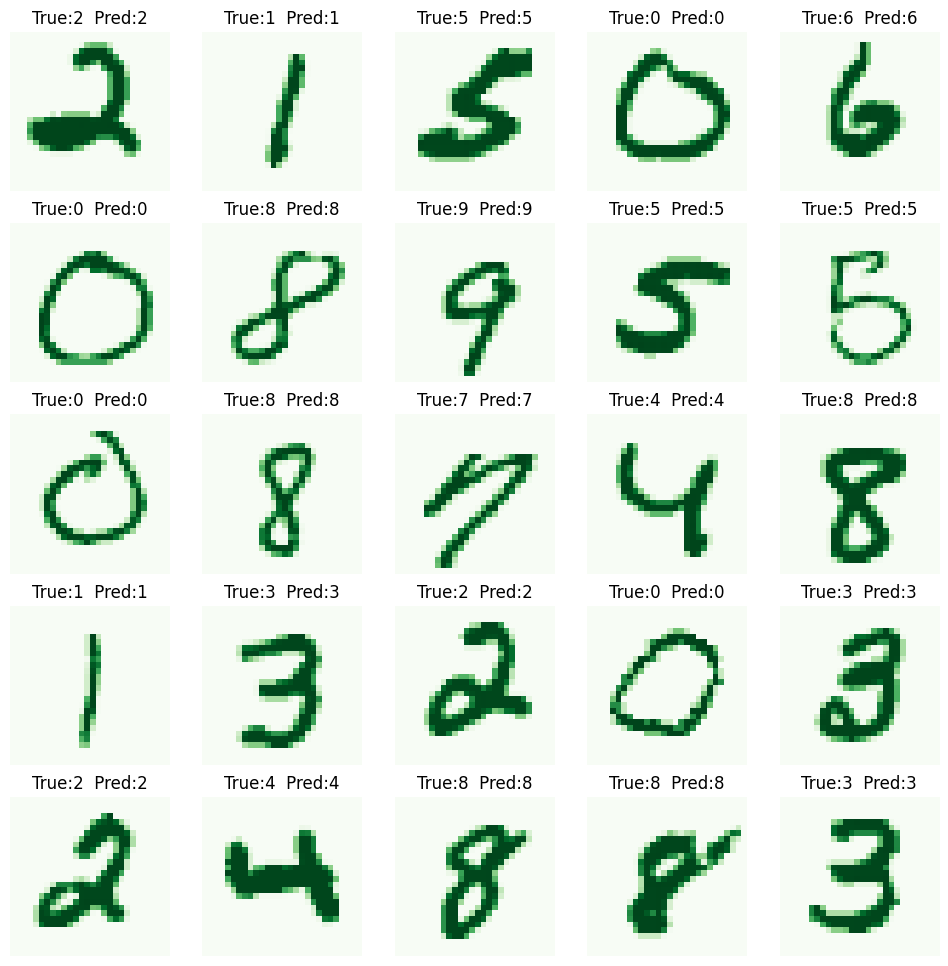

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,5, figsize=(12,12))

    for i, indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{}  Pred:{}".format(y_true[indx],Y_pred_classes[indx]))
    plt.show()

plot_images(correct, "Greens")

## Displaying some Misclassified predicted samples

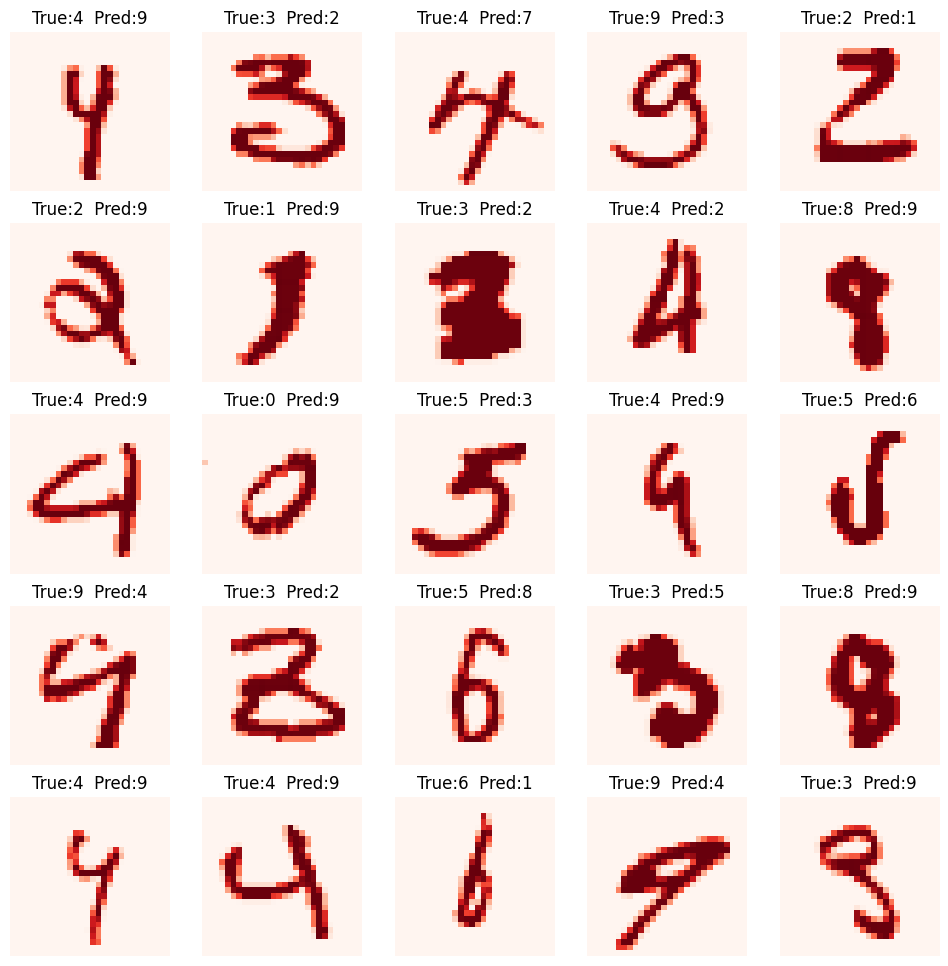

In [ ]:
plot_images(misclassified, "Reds")

# Model Comparision

## Add L2 Regularization to the Model

L2 regularization helps prevent overfitting by penalizing large weights in the network. We add it to the Dense layers like this:

In [ ]:
model_l2= Sequential()
model_l2.add(Dense(256, input_shape=(784,), activation='relu', kernel_regularizer=l2(0.001))),
model_l2.add(BatchNormalization()),
model.add(Dropout(0.3)),

model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001))),
model_l2.add(BatchNormalization()),
model.add(Dropout(0.3)),

model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001))),
model_l2.add(BatchNormalization()),

model_l2.add(Dense(10, activation='softmax'))

# Print model summary
model_l2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

📌 Explanation of Changes

kernel_regularizer=l2(0.001) applies L2 penalty to the layer weights.

L2 discourages large weights, helping reduce overfitting especially with high-capacity models.

Other components like BatchNorm and Dropout are kept the same.

# Compare Training With and Without Regularization
train both models (baseline and L2-regularized), collect their accuracy/loss histories, and compare them visually.

In [ ]:
# Compile both models
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use the same callback for both
callbacks = myCallback()

# Train the original model (with Dropout & BatchNorm)
history_baseline = model.fit(x_train, y_train,
                             batch_size=128, epochs=10,
                             validation_split=0.1,
                             callbacks=[callbacks], verbose=2)

# Train the L2-regularized model
history_l2 = model_l2.fit(x_train, y_train,
                          batch_size=128, epochs=10,
                          validation_split=0.1,
                          callbacks=[callbacks], verbose=2)


Epoch 1/10
380/380 - 8s - 20ms/step - accuracy: 0.4864 - loss: nan - val_accuracy: 0.9776 - val_loss: 0.0857
Epoch 2/10
380/380 - 5s - 13ms/step - accuracy: 0.4845 - loss: nan - val_accuracy: 0.9793 - val_loss: 0.0781
Epoch 3/10
380/380 - 5s - 12ms/step - accuracy: 0.4853 - loss: nan - val_accuracy: 0.9780 - val_loss: 0.0847
Epoch 4/10
380/380 - 4s - 10ms/step - accuracy: 0.4848 - loss: nan - val_accuracy: 0.9787 - val_loss: 0.0793
Epoch 5/10
380/380 - 5s - 14ms/step - accuracy: 0.4830 - loss: nan - val_accuracy: 0.9772 - val_loss: 0.0920
Epoch 6/10
380/380 - 5s - 12ms/step - accuracy: 0.4825 - loss: nan - val_accuracy: 0.9765 - val_loss: 0.0789
Epoch 7/10
380/380 - 4s - 10ms/step - accuracy: 0.4806 - loss: nan - val_accuracy: 0.9789 - val_loss: 0.0769
Epoch 8/10
380/380 - 5s - 14ms/step - accuracy: 0.4878 - loss: nan - val_accuracy: 0.9733 - val_loss: 0.0884
Epoch 9/10
380/380 - 4s - 11ms/step - accuracy: 0.4868 - loss: nan - val_accuracy: 0.9781 - val_loss: 0.0796
Epoch 10/10
380/380

# Plot Training vs Validation Accuracy for Both

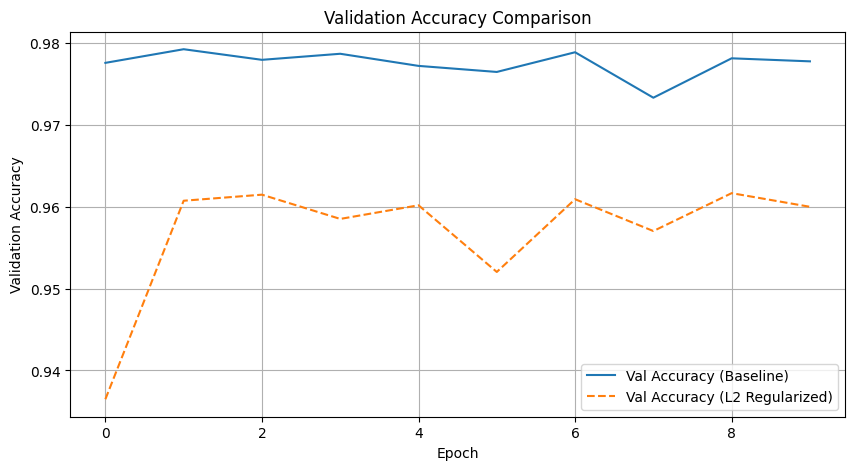

In [ ]:
# Plot comparison of training and validation accuracy
plt.figure(figsize=(10, 5))

plt.plot(history_baseline.history['val_accuracy'], label='Val Accuracy (Baseline)')
plt.plot(history_l2.history['val_accuracy'], label='Val Accuracy (L2 Regularized)', linestyle='--')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


| Feature                 | **Original Model**                        | **L2-Regularized Model**                       |
| ----------------------- | ----------------------------------------- | ---------------------------------------------- |
| Dropout                 | ✅ Yes (0.3 after 1st & 2nd hidden layers) | ✅ Yes                                          |
| Batch Normalization     | ✅ Yes                                     | ✅ Yes                                          |
| L2 Regularization       | ❌ No                                      | ✅ Yes (λ = 0.001)                              |
| Overfitting Control     | Medium (Dropout + BN)                     | Stronger (Dropout + BN + L2)                   |
| Training Time           | Slightly faster                           | Slightly slower due to regularization overhead |
| Expected Generalization | Good                                      | Better in most cases, especially on noisy data |


# CNN

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

l2_reg = l2(0.001)

# Reshape the input data for CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Define the CNN model
model_cnn = Sequential([

    # 1st Convolution Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # 2nd Convolution Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten before dense layers
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer (10 classes for digits 0-9)
    Dense(10, activation='softmax')
])

# Model summary
model_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Compile
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train
cnn_history = model_cnn.fit(x_train_cnn, y_train,
                            batch_size=128,
                            epochs=20,
                            validation_split=0.1,
                            callbacks=[callbacks],
                            verbose=2)


Epoch 1/20
380/380 - 61s - 162ms/step - accuracy: 0.9182 - loss: 0.2679 - val_accuracy: 0.3120 - val_loss: 2.3854
Epoch 2/20
380/380 - 80s - 210ms/step - accuracy: 0.9703 - loss: 0.0938 - val_accuracy: 0.9811 - val_loss: 0.0598
Epoch 3/20
380/380 - 84s - 221ms/step - accuracy: 0.9781 - loss: 0.0726 - val_accuracy: 0.9857 - val_loss: 0.0469
Epoch 4/20
380/380 - 80s - 212ms/step - accuracy: 0.9809 - loss: 0.0621 - val_accuracy: 0.9861 - val_loss: 0.0428
Epoch 5/20
380/380 - 83s - 217ms/step - accuracy: 0.9833 - loss: 0.0539 - val_accuracy: 0.9881 - val_loss: 0.0382
Epoch 6/20
380/380 - 82s - 217ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9891 - val_loss: 0.0366
Epoch 7/20
380/380 - 81s - 213ms/step - accuracy: 0.9868 - loss: 0.0432 - val_accuracy: 0.9902 - val_loss: 0.0329
Epoch 8/20
380/380 - 83s - 218ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9900 - val_loss: 0.0319
Epoch 9/20
380/380 - 56s - 148ms/step - accuracy: 0.9872 - loss: 0.0395 - val_accuracy: 

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model_cnn.evaluate(x_test_cnn, y_test,verbose=2)
print("Test Accuracy: ", test_acc)
print("Test loss:", test_loss)

188/188 - 2s - 9ms/step - accuracy: 0.9925 - loss: 0.0277
Test Accuracy:  0.9925000071525574
Test loss: 0.027677133679389954


In [ ]:
# Extract final training accuracy
train_acc = cnn_history.history['accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.4f}")


Final Training Accuracy: 0.9923


In [ ]:
val_acc = cnn_history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_acc:.4f}")


Final Validation Accuracy: 0.9913


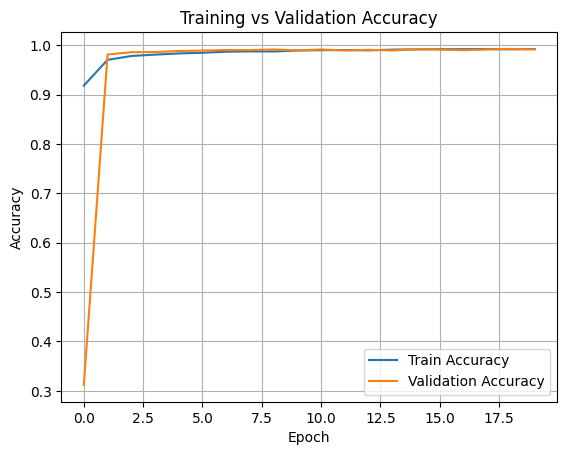

In [ ]:
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


We can see in the CNN model the accuracy achieved on

Training data: 0.9923

Validation data: 0.9913

Test data:  0.992500007152557

As we use batch normalisation and dropout in the CNN, the problem of overfitting is overcome